# matplotlib 라이브러리 자유 자재로 사용하기

### 1. 기초 그래프 그리기

앞서 앤스콤 4분할 그래프를 그릴 때 제목을 추가하기 위해 set_title 메서드를 사용했던 것을 기억할 것이다.
이밖에도 matplotlib 라이브러리에는 그래프를 그리기 위한 다양한 메서드가 준비되어 있다.

seaborn 라이브러리에는 tips라는 데이터 집합이 있다. tips 데이터 집합은 어떤 식당에서 팁을 지불한 손님의 정보를 모아둔 것이다.

1) tips 데이터 집합을 불러와 변수 tips에 저장한다.

In [2]:
import seaborn as sns

anscombe = sns.load_dataset("anscombe")

In [6]:
%matplotlib notebook
import matplotlib.pyplot as plt

In [7]:
tips = sns.load_dataset("tips")
print(tips.head())
print(type(tips))

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4
<class 'pandas.core.frame.DataFrame'>


2) 히스토그램은 데이터프레임의 열 데이터 분포와 빈도를 살펴보는 용도로 자주 사용하는 그래프이다. 이 때 데이터프레임의 totall_bill,tip 등의 열을 변수라고 부른다. 그리고 변수 하나만을 사용해서 그린 그래프를 '일변량 그래프' 라고 부른다.

3) 기본 틀을 마련하고 그래프 격자를 구성하는 것 까지 진행해보자.

<IPython.core.display.Javascript object>


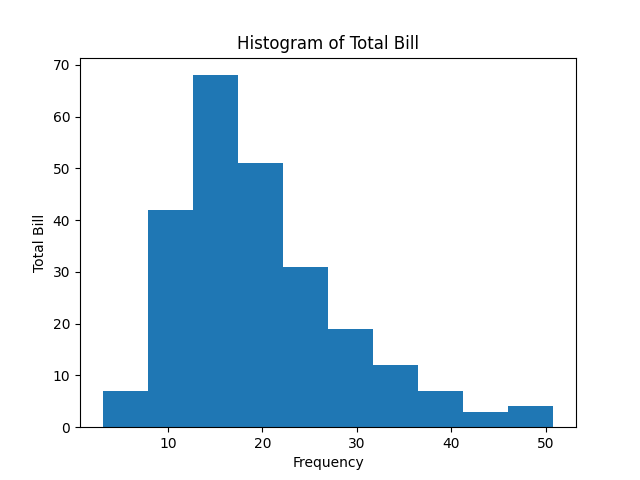

In [111]:
fig = plt.figure()
axes1 = fig.add_subplot(1,1,1)

4) hist 메섣에 totall_bill 열을 전달하면 히스토그램이 만들어 진다. 이때 x축의 간격은 bins 인잣값으로 조정이 가능하다. bins 인잣값을 10으로 지정하면 x축의 간격을 10으로 조정할 수 있다. 나머지는 x,y축의 제목을 추가하는 코드이다.

In [121]:
axes1.hist(tips['total_bill'], bins=10)
axes1.set_title('Histogram of Total Bill')
axes1.set_xlabel('Frequency')
axes1.set_ylabel('Total Bill')

fig

5) 이번에는 산점도 그래프를 그려보자. 산점도 그래프는 변수 2개를 사용해서 만드는 그래프이며 변수 2개를 사용하기 때문에 통계 용어로 '이변량 그래프' 라고 부른다.

6) 기본 틀과 그래프 격자를 만들고 scatter 메서드에 totall_bill,tips 열을 전달하면 산점도 그래프가 나타난다.

<IPython.core.display.Javascript object>


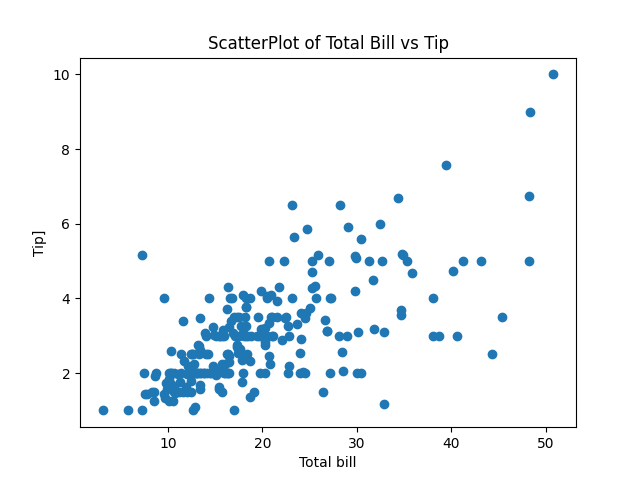

Text(0, 0.5, 'Tip]')

In [113]:
scatter_plot = plt.figure()
axes1 = scatter_plot.add_subplot(1,1,1)
axes1.scatter(tips['total_bill'], tips['tip'])
axes1.set_title('ScatterPlot of Total Bill vs Tip')
axes1.set_xlabel('Total bill')
axes1.set_ylabel('Tip]')

7) 이번에는 박스 그래프를 그려보자. 박스 그래프는 이산형 변수와 연속형 변수를 함께 사용하는 그래프이다. 이산형 변수란 Female, Male 과 같이 명확하게 구분되는 값을 의미하고, 연속형 변수란 Tip과 같이 명확하게 셀 수 없는 범위의 값을 의미한다.

8) boxplot 메서드를 사용하면 박스 그래프를 그릴 수 있다.

<IPython.core.display.Javascript object>


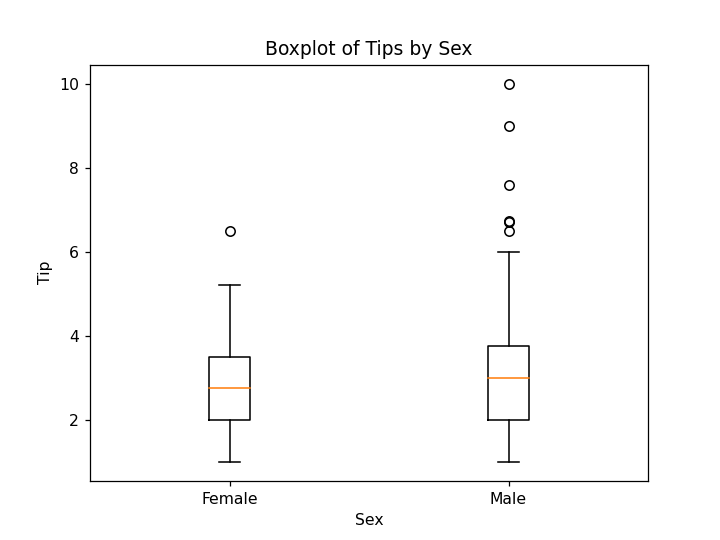

Text(0.5, 1.0, 'Boxplot of Tips by Sex')

In [122]:
boxplot = plt.figure()
axes1 = boxplot.add_subplot(1,1,1)

axes1.boxplot([tips[tips['sex'] == 'Female']['tip'],
              tips[tips['sex'] == 'Male']['tip']],
              labels=['Female', 'Male'])

axes1.set_xlabel('Sex')
axes1.set_ylabel('Tip')
axes1.set_title('Boxplot of Tips by Sex')

### 2. 다변량 그래프 그리기


##### 다변량 그래프가 필요한 이유?

앞에서 지불 금액과 팁만을 사용하여 산점도 그래프를 그려보았다. 만약 여기에 성별을 추가하여 산점도 그래프를 그리면 어떻게 해야할까?
점의 색상을 다르게 하면 된다. 만약 식사비용을 추가한다면 점의 크기를 다르게 다르게 하는 방법으로 산점도 그래프를 표현할 수 있다.

1) 앞에서 실습한 산점도 그래프에 성별을 새 변수로 추가해보자. 성별을 색상으로 구분하자. 하지만 Female,Male 과 같은 문자열은 산점도 그래프의 색상을 지정하는 값으로 사용할 수 없다. 0과 1과 같은 정수를 사용해야 한다.따라서 각 문자열을 정수로 치환하는 함수를 만들어야 한다.
다음은 여성인 경우 0을 반환하고 남성인 경우 1을 반환하는 함수이다.

In [116]:
def recode_sex(sex):
    if sex == 'Female':
        return 0
    else:
        return 1

2) 이제 recode_sex 메서드가 반환한 값을 데이터 프레임에 추가하면 된다. 다음은 recode_sex 함수가 반환한 값을 데이터프레임에 sex_color열을 새로 생성하여 추가한 것이다. 이때 sex 열에 recode_sex 함수를 브로드캐스팅 하기 위해 apply 메서드를 사용한다.

In [117]:
tips['sex_color'] = tips['sex'].apply(recode_sex)

3) 테이블당 인원 수도 산점도 그래프에 추가해 보자. 테이블당 인원 수는 점의 크기로 표현하자. 다음은 scatter 메서드에 s,c 인잣값으로 테이블당 인원 수와 성별의 치환값을 전달한 것이다. alpha 인잣값을 0.5로 지정하여 점의 투명도를 보기좋게 하였다.

<IPython.core.display.Javascript object>


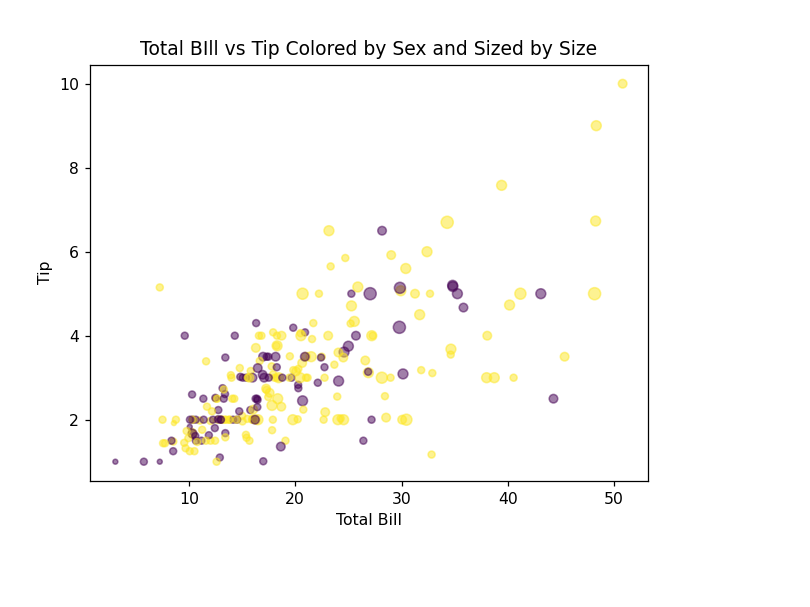

Text(0, 0.5, 'Tip')

In [118]:
scatter_plot = plt.figure()
axes1 = scatter_plot.add_subplot(1,1,1)
axes1.scatter(
    x=tips['total_bill'],
    y=tips['tip'],
    s=tips['size']*10,
    c=tips['sex_color'],
    alpha=0.5)
axes1.set_title('Total BIll vs Tip Colored by Sex and Sized by Size')
axes1.set_xlabel('Total Bill')
axes1.set_ylabel('Tip')


# seaborn 라이브러리 자유자재로 사용하기


앞에서 우린 seaborn 라이브러리의 tips 데이터 집합만 사용했지만 이번에는 seaborn 라이브러리 자체를 활용하여 그래프를 그려보자.
seaborn 라이브러리를 사용하면 matplotlib 보다 좀 더 화려한 그래프를 그릴 수 있다.



1) 먼저 tips 데이터 집합을 불러온다. 

In [126]:
import seaborn as sns

tips = sns.load_dataset("tips")

2) seaborn 라이브러리로 히스토그램을 그리려면 subplots, distplot 메서드를 사용하면 된다. 먼저 subplots 메서드로 기본틀을 만들고 distplot 메서드에 total_bill 열 데이터를 전달하면 히스토그램을 그릴 수 있다.

In [127]:
ax = plt.subplot()
ax = sns.distplot(tips['total_bill'])
ax.set_title('Total Bill Histogram with Density Plot')

Text(0.5, 1.0, 'Total Bill Histogram with Density Plot')

3) 이 때 distplot 메서드를 사용하면 히스토그램과 밀집도 그래프를 같이 그린다.

<IPython.core.display.Javascript object>


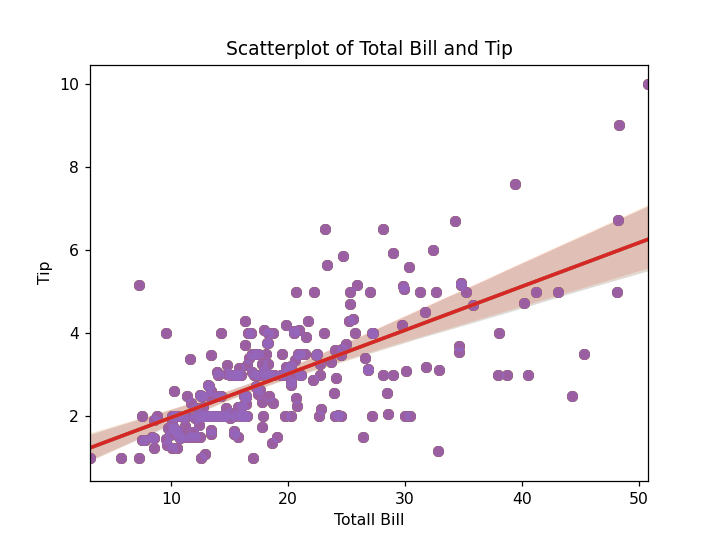

C:\Users\이재윤\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Frequency')

In [128]:
ax = plt.subplots()
ax = sns.distplot(tips['total_bill'], kde=False)
ax.set_title('Total Bill Histogram')
ax.set_xlabel('Total Bill')
ax.set_ylabel('Frequency')

4) 밀집도 그래프만 나타내려면 hist인자를 False로 지정하면 된다.

<IPython.core.display.Javascript object>


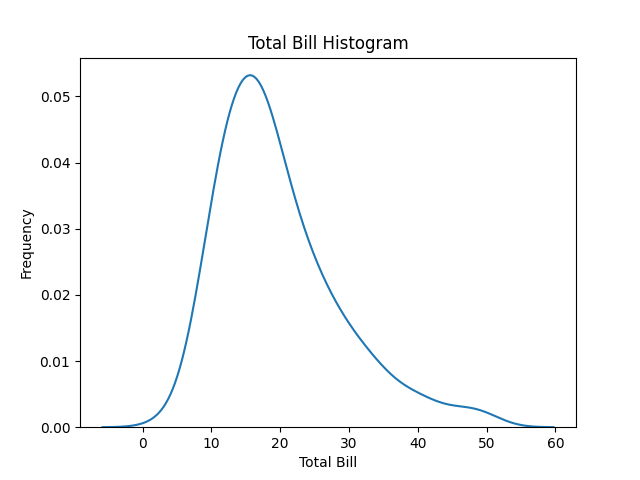

C:\Users\이재윤\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Frequency')

In [108]:
ax = plt.subplots()
ax = sns.distplot(tips['total_bill'], hist=False)
ax.set_title('Total Bill Histogram')
ax.set_xlabel('Total Bill')
ax.set_ylabel('Frequency')

5) 실무에서는 데이터 시각화를 더 효율적으로 하기 위해 여러 그래프를 한 번에 출력하는 경우가 많다. 다음은 히스토그램과 밀집도를 그리는 distplot 메서드에 rug 인자를 추가하여 양탄자 그래프까지 그린 것이다.

<IPython.core.display.Javascript object>


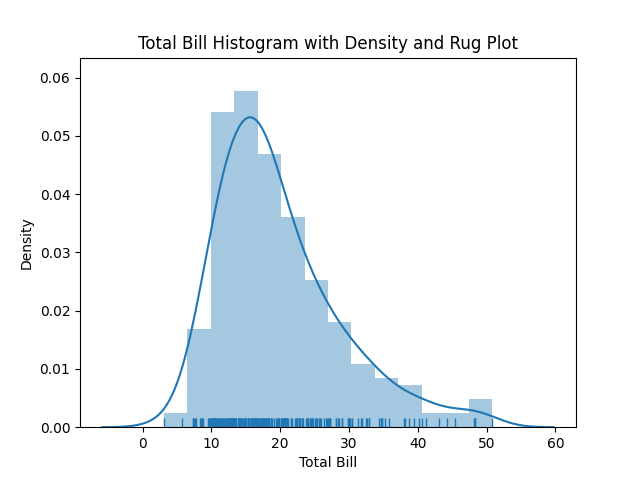

C:\Users\이재윤\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\이재윤\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Total Bill')

In [107]:
ax = plt.subplots()
ax = sns.distplot(tips['total_bill'], rug=True)
ax.set_title('Total Bill Histogram with Density and Rug Plot')
ax.set_xlabel('Total Bill')

6) 이번엔 히스토그램과 비슷하게 생긴 count 그래프를 그려보자. count 그래프는 이산값을 나타내는 그래프이다. 다음음 countplot 메서드에 tips 데이터프레임의 day 열 데이터를 넣어 count 그래프를 그린 것이다.

<IPython.core.display.Javascript object>


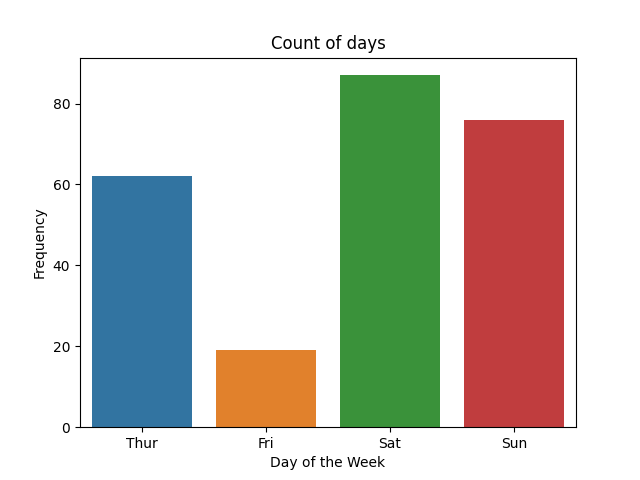

C:\Users\이재윤\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Frequency')

In [106]:
ax = plt.subplots()
ax = sns.countplot('day', data=tips)
ax.set_title('Count of days')
ax.set_xlabel('Day of the Week')
ax.set_ylabel('Frequency')

### *다양한 종류의  이변량 그래프 그리기

1) serborn 라이브러리로 산점도 그래프 그리기

seaborn 라이브러리는 matplotlib 라이브러리보다 다양한 방법으로 산점도 그래프를 그릴 수 있다. 산점도 그래프를 그리려면 seaborn 라이브러리의 regplot 메서드를 사용해야 한다. regplot 메서드를 사용하면 산점도 그래프와 회귀선을 함꼐 그릴 수 있다. 회귀선을 제거하려면 fit_reg 인자를 False로 지정하면 된다.

In [132]:
ax = plt.subplot()
ax = sns.regplot(x='total_bill', y='tip', data=tips)
ax.set_title('Scatterplot of Total Bill and Tip')
ax.set_xlabel('Totall Bill')
ax.set_ylabel('Tip')

<ipython-input-132-c5bbbe5d72f5>:1: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot()


Text(52.8125, 0.5, 'Tip')

In [133]:
ax = plt.subplot()
ax = sns.regplot(x='total_bill', y='tip', data=tips, fit_reg=False)
ax.set_title('Scatterplot of Total Bill and Tip')
ax.set_xlabel('Totall Bill')
ax.set_ylabel('Tip')

<ipython-input-133-c4e38c96cc24>:1: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot()


Text(52.8125, 0.5, 'Tip')

2) 이번에는 산점도 그래프와 히스토그램을 한 번에 그려주는 jointplot 메서드를 사용해 보자.

<IPython.core.display.Javascript object>


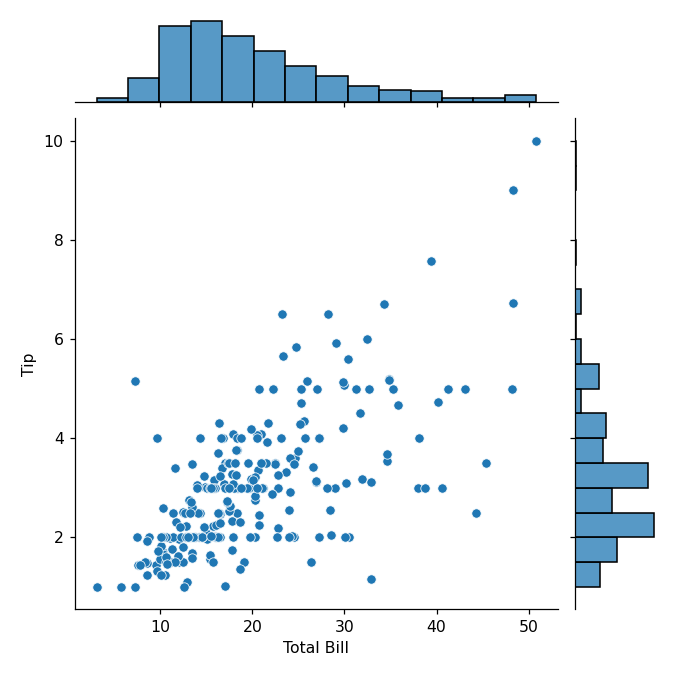

Text(0.5, 1.03, 'Joint Plot of Total Bill and Tip')

In [59]:
joint = sns.jointplot(x='total_bill', y='tip', data=tips)
joint.set_axis_labels(xlabel='Total Bill', ylabel='Tip')
joint.fig.suptitle('Joint Plot of Total Bill and Tip', fontsize=10, y=1.03)

3) 산점도 그래프는 점이 겹쳐 보일 경우 점을 구분하기 어렵다는 점이 있다. 만약 산점도 그래프의 데이터를 구분하기 쉽게 그리고 싶다면 육각 그래프를 사용하면 됩니다. 

<IPython.core.display.Javascript object>


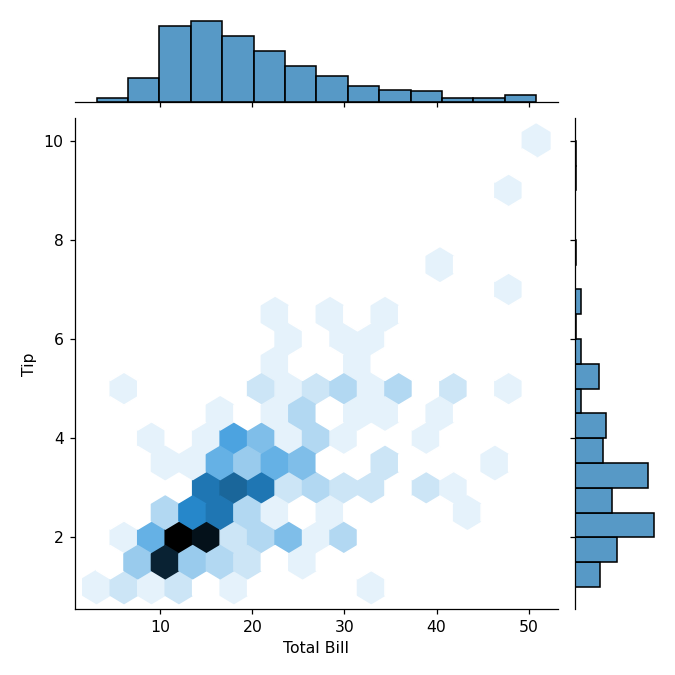

Text(0.5, 1.03, 'Hexbin Joint Plot of Total Bill and Tip')

In [60]:
hexbin = sns.jointplot(x="total_bill", y="tip", data=tips, kind="hex")
hexbin.set_axis_labels(xlabel='Total Bill', ylabel='Tip')
hexbin.fig.suptitle('Hexbin Joint Plot of Total Bill and Tip', fontsize=10, y=1.03)

4) 이번에는 이차원 밀집도를 그려보자. 이차원 밀집도는 kdeplot 메서드로 만들 수 있다. 다음은 total_bill, tip 열 데이터를 전달하여 이차원 밀집도를 그린 것이다. 이때 shade 인잣값을 True 로 지정하면 그래프에 음영 효과를 줄 수 있다.

<IPython.core.display.Javascript object>


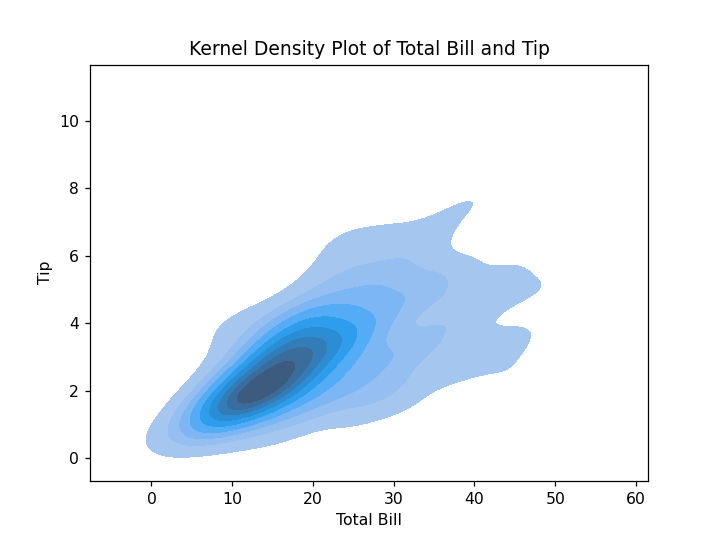

C:\Users\이재윤\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:1639: FutureWarning: Use `x` and `y` rather than `data` `and `data2`
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Tip')

In [135]:
ax = plt.subplots()
ax = sns.kdeplot(data=tips['total_bill'],
                 data2=tips['tip'],
                 shade=True)
ax.set_title('Kernel Density Plot of Total Bill and Tip')
ax.set_xlabel('Total Bill')
ax.set_ylabel('Tip')

5) 이번엔 바 그래프를 그려보자. 바 그래프는 지정한 변수의 평균을 계산하여 그릴 수 있다.

<IPython.core.display.Javascript object>


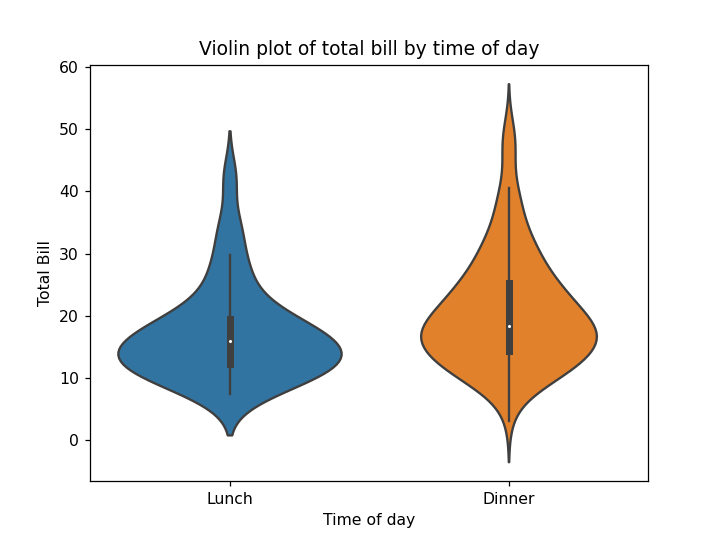

Text(0, 0.5, 'Average totall bill')

In [136]:
ax = plt.subplots()
ax = sns.barplot(x='time', y='total_bill', data=tips)
ax.set_title('Bar plot of average total bill for time of day')
ax.set_xlabel('Time of day')
ax.set_ylabel('Average totall bill')

6) 박스 그래프도 그려보자. 박스 그래프는 최솟값, 1분위수, 중간값, 3분위수, 최댓값, 이상치 등 다양한 통계량을 한 번에 표현하는 그래프이다.


<IPython.core.display.Javascript object>


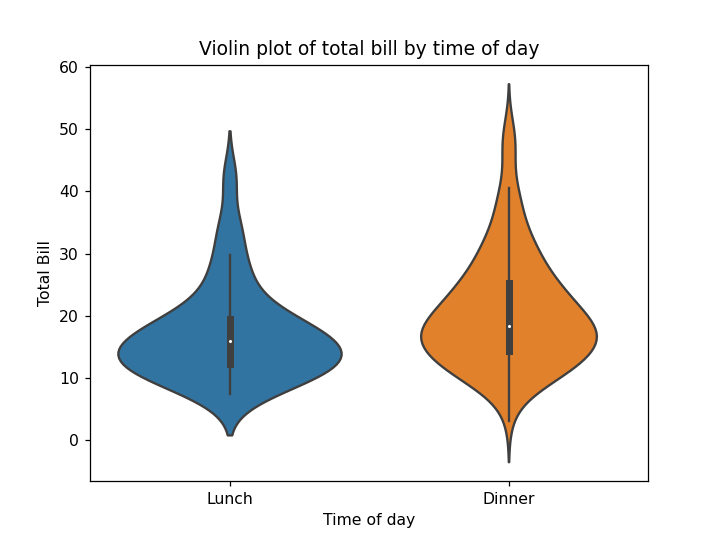

AttributeError: 'AxesSubplot' object has no attribute 'set_ylable'

In [138]:
ax =  plt.subplots()
ax =  sns.boxplot(x='time', y='total_bill', data=tips)
ax.set_title('Boxplot of total bill by time of day')
ax.set_xlabel('Time of dat')
ax.set_ylable('Total Bill')

7) 박스 그래프는 다양한 통계 수치를 확인하기 위해 자주 사용하는 그래프이지만 데이터 분석이 모호하게 표현된다. 이런 경우 박스 그래프에 커널 밀도를 추정한 바이올린 그래프를 사용하면 된다. 바이올린 그래프는 violinplot 메서드를 사용하여 그릴 수 있다.

In [139]:
ax = plt.subplot()
ax = sns.violinplot(x='time', y='total_bill', data=tips)
ax.set_title('Violin plot of total bill by time of day')
ax.set_xlabel('Time of day')
ax.set_ylabel('Total Bill')

Text(0, 0.5, 'Total Bill')

8) 마지막으로 관계 그래프를 그려보자. 관계 그래프는 지금까지 설명한 그래프를 종합한 그래프라고 생각하면 된다. 관계 그래프는 pairplot 메서드에 데이터프레임을 넣는 방법으로 간단하게 그릴 수 있다.

<IPython.core.display.Javascript object>


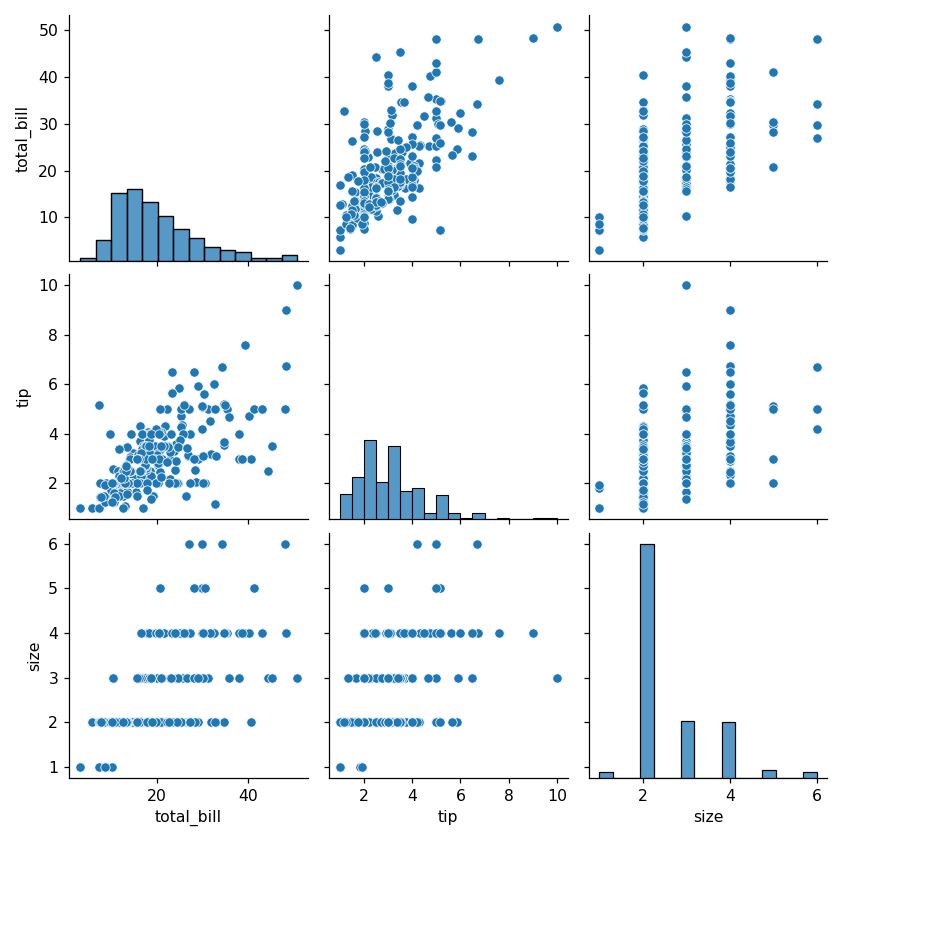

In [119]:
fig = sns.pairplot(tips)

9) 이때 관계 그래프는 중복된 정보가 표현된다는 단점이 있다. 이런 경우에는 중복된 그래프가 그려지는 위치를 직접 지정하여 원하는 그래프로 교체하면 된다.

map_upper 메서드는 대각선을 기준으로 위쪽에 그릴 그래프를 지정한다. 반대로 map_lower 메서드는 대각선을 기준으로 아래쪽에 그릴 그래프를 지정한다.

C:\Users\이재윤\AppData\Roaming\Python\Python39\site-packages\seaborn\axisgrid.py:1183: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(len(y_vars), len(x_vars),


<IPython.core.display.Javascript object>


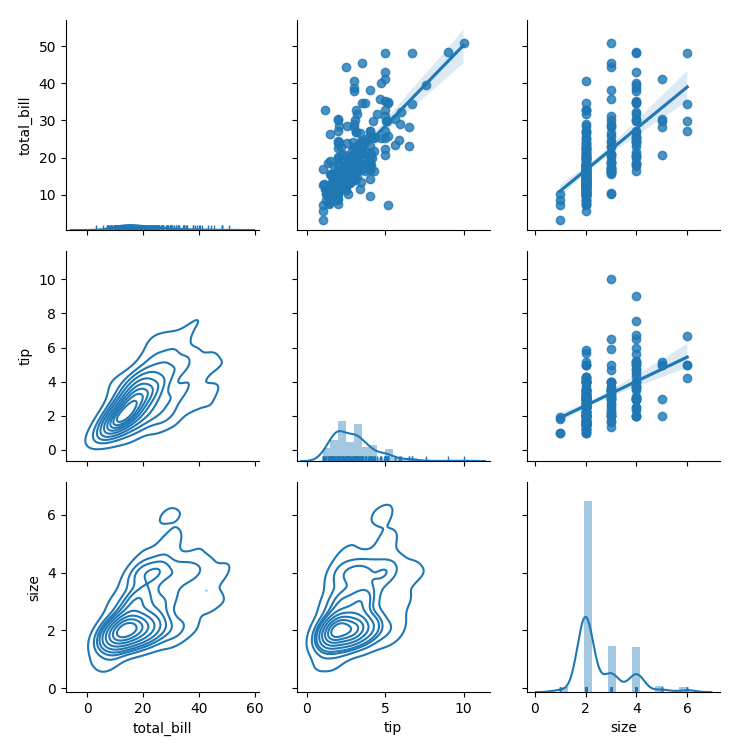

C:\Users\이재윤\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\이재윤\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
C:\Users\이재윤\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users

In [90]:
pair_grid = sns.PairGrid(tips)
pair_grid = pair_grid.map_upper(sns.regplot)
pair_grid = pair_grid.map_lower(sns.kdeplot)
pair_grid = pair_grid.map_diag(sns.distplot, rug=True)
plt.show()

### *다변량 그래프 그리기

1) seaborn 라이브러리로 바이올린 그래프 그리기 -  색상추가

먼저 바이올린 그래프를 그리되 그래프의 색상을 추가해보자. 색상을 추가하는 방법은 vilolinplot 메서드에 hue 인잣값으로 색상에 사용할 열 이름을 추가하면 된다.

<ipython-input-91-fcb09bff55d3>:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  ax = plt.subplots()


<IPython.core.display.Javascript object>


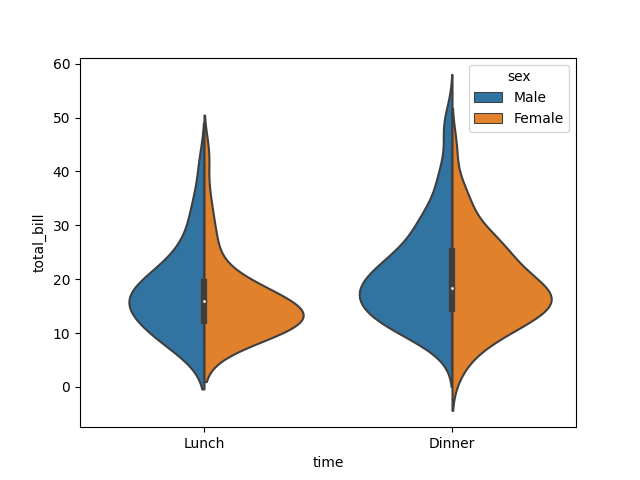

In [91]:
ax = plt.subplots()
ax = sns.violinplot(x='time', y='total_bill', hue='sex', data=tips, split=True)

2) 산점도, 관계 그래프 그리기 -  색상추가

산점도 그래프, 관계 그래프를 그리는 경우에도 마찬가지 방법으로 색상을 추가할 수 있다.

C:\Users\이재윤\AppData\Roaming\Python\Python39\site-packages\seaborn\axisgrid.py:392: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


<IPython.core.display.Javascript object>


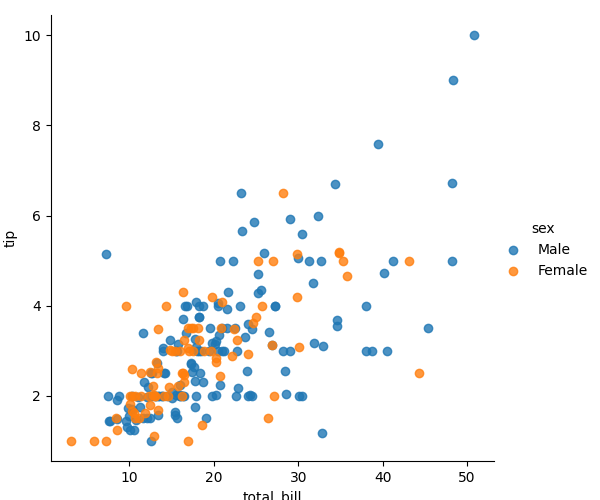

In [92]:
scatter = sns.lmplot(x='total_bill', y='tip', data=tips, hue='sex', fit_reg=False)

C:\Users\이재윤\AppData\Roaming\Python\Python39\site-packages\seaborn\axisgrid.py:1183: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(len(y_vars), len(x_vars),


<IPython.core.display.Javascript object>


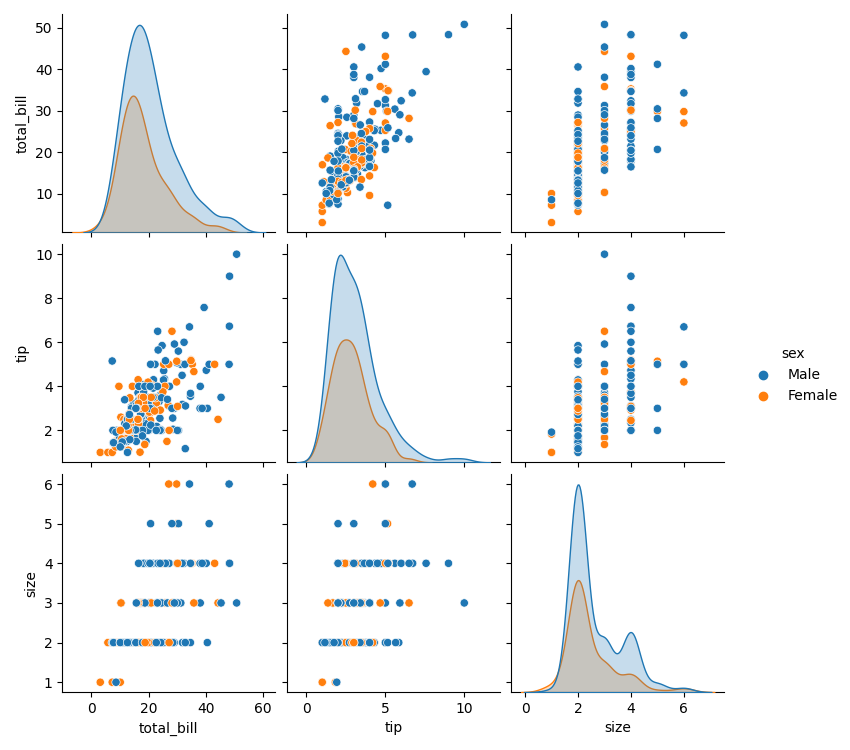

In [93]:
fig = sns.pairplot(tips, hue='sex')

3) 산점도 그래프의 크기와 모양 조절하기

이번에는 산점도 그래프의 크기와 모양을 조절해 보자. 산점도 그래프의 점 크기를 조절하려면 scatter_kws에 딕셔너리 형태로 인잣값을 전달하면 된다. 여기서는 크기만 조절하기 위해 's':tips['size']를 딕셔너리에 담아 전달했다.

In [81]:
scatter = sns.lmplot(x='total_bill', y='tip', data=tips, fit_reg=False, hue='sex',
                    scatter_kws={'s': tips['size']*10})

4) 만약 산점도 그래프의 점을 다른 기호로 표현하고 싶다면 markers 인잣값에 표현하고자 하는 기호를 리스트에 담아 전달하면 된다.

C:\Users\이재윤\AppData\Roaming\Python\Python39\site-packages\seaborn\axisgrid.py:392: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


<IPython.core.display.Javascript object>


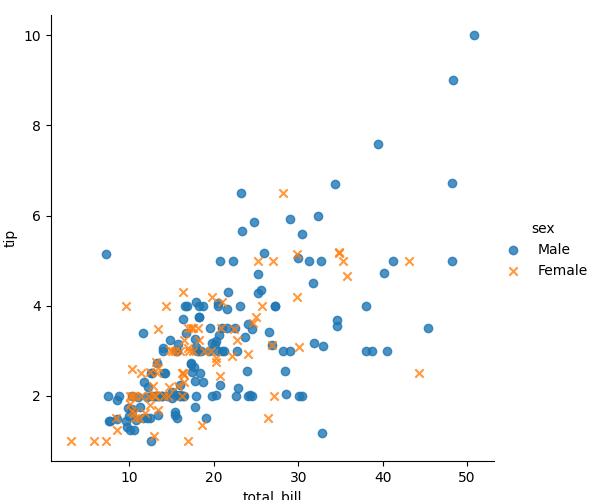

In [94]:
scatter = sns.lmplot(x = 'total_bill', y = 'tip', data = tips, fit_reg = False, hue='sex',
                     markers=['o', 'x'])

5) lmplot 메서드로 4개의 데이터 그룹에 대한 그래프 한 번에 그리기

다음은 앤스콤 4분할 그래프를 lmplot 메서드로 그린 것이다. x와 y인자에는 앤스콤 데이터 집합의 x,y 열을 전달하고 data 인자에는 데이터프레임을 전달 했다. 

<IPython.core.display.Javascript object>


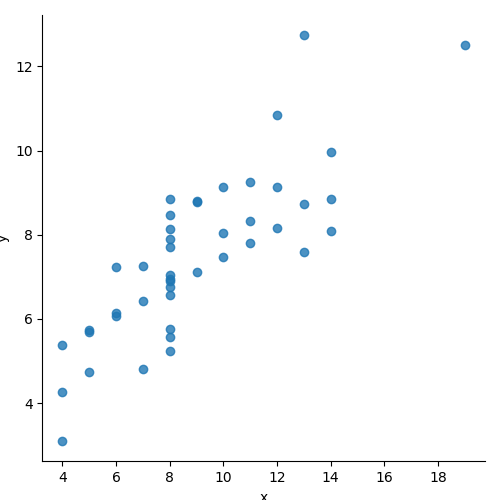

In [95]:
anscombe_plot = sns.lmplot(x='x', y='y', data=anscombe, fit_reg=False)

6) 그룹별로 그래프를 나누어 그리려면 lmplot 메서드에 추가로 col,col_warp 인자를 설정해야 한다. col_wrap 인자에는 그래프를 그릴 열의 최댓값을 지정하고 col 인자에는 데이터 그룹을 구분한 열을 지정했다.

C:\Users\이재윤\AppData\Roaming\Python\Python39\site-packages\seaborn\axisgrid.py:411: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)


<IPython.core.display.Javascript object>


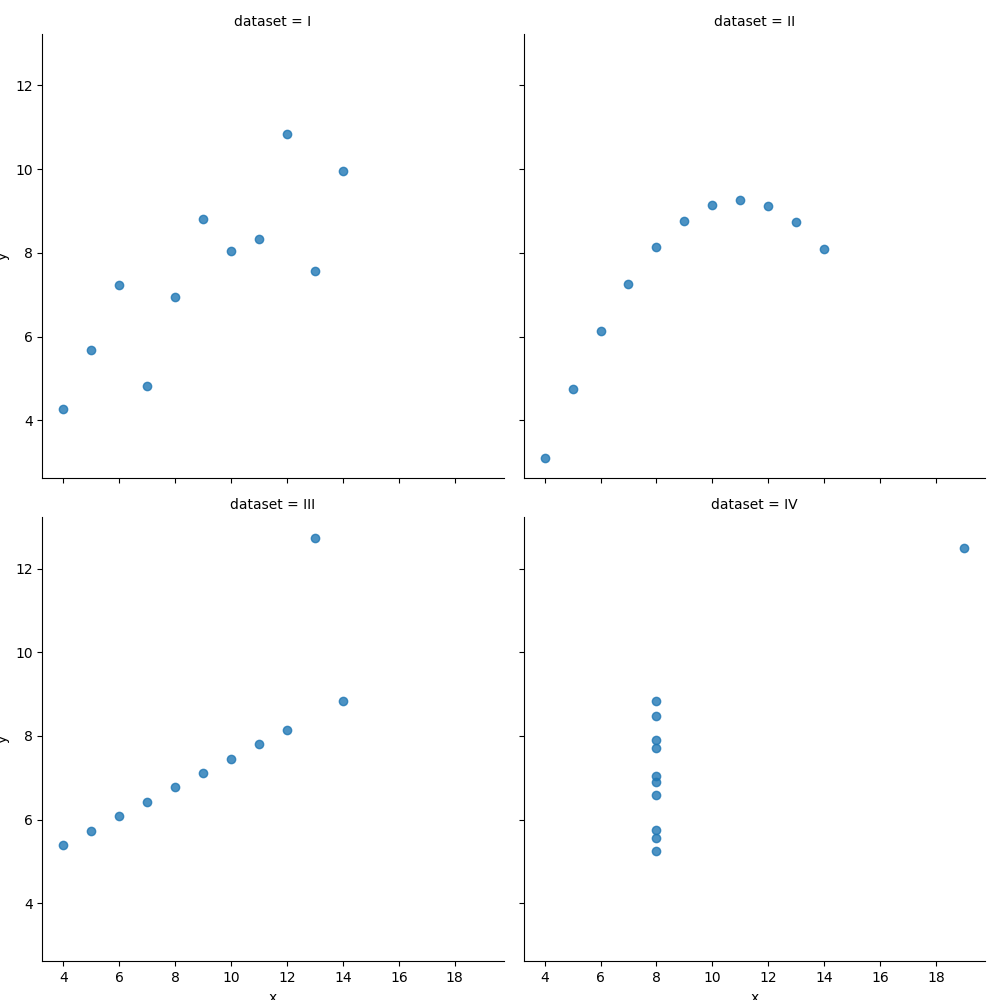

In [96]:
ascombe_plot = sns.lmplot(x='x',y='y', data=anscombe, fit_reg=False,
                         col='dataset', col_wrap=2)

### *plus! FacetGrid 클래스로도 그룹별 그래프를 그릴 수 있다.

1) 먼저 FacetGrid에 데이터프레임과 그룹을 구분할 열 이름을 전달하여 객체를 생성한다. 그런 다음 객체의 map 메서드에 그래프의 종류와 x축으로 지정할 열 이름을 순서대로 전달하면 히스토그램,밀집도,양탄자 그래프를 그릴 수 있다.

<IPython.core.display.Javascript object>


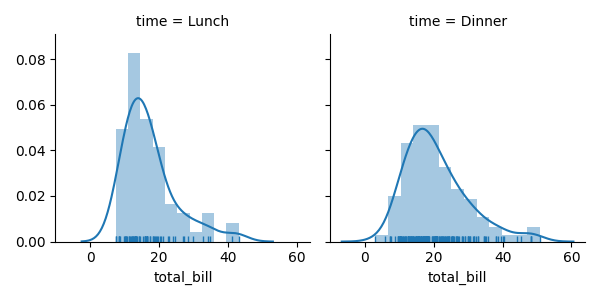

C:\Users\이재윤\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\이재윤\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
C:\Users\이재윤\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users

In [100]:
facet = sns.FacetGrid(tips, col='time')
facet.map(sns.distplot, 'total_bill', rug=True)

2) 다변량 그래프도 그려보자. 다음은 tips 데이터 집합의 day 열로 그룹을 구분하여 그래프를 그린 것이다.

<IPython.core.display.Javascript object>


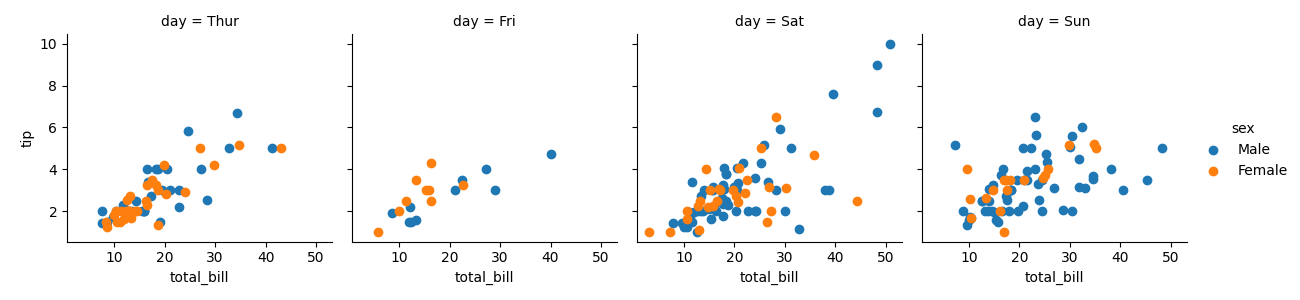

In [103]:
facet = sns.FacetGrid(tips, col='day', hue='sex')
facet = facet.map(plt.scatter, 'total_bill', 'tip')
facet = facet.add_legend()

3) 이번에는 더 많은 변수를 사용하여 그래프를 그려보자. 다음은 time, smoker 열을 사용하여 산점도 그래프를 그린 것이다. time, smoker 열은 각각 2개의 값을 가지고 있다.

<IPython.core.display.Javascript object>


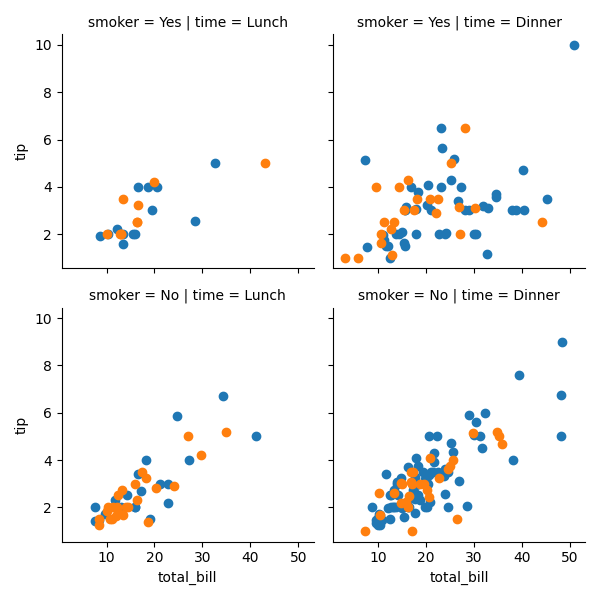

In [104]:
facet = sns.FacetGrid(tips, col='time', row='smoker',hue='sex')
facet.map(plt.scatter, 'total_bill', 'tip')